<b><i>PYHS6660 Nuclear and Particle Physics, University of Kent</b></i> 
# SEMI-EMPIRICAL MASS FORMULA

<b><i>Mike Hughes, August 2021</b></i>

This Jupyter notebook demonstrates how the SEMF can be used to predict the binding energy of stable nuclei. First we will use model parameters (the constants in front of each term of the formula) from the literature and compare the preducted binding energies with experimental data. We will then try to obtain a set of parameters by dong our own fit to the experimental data. Finally we will see that the SEMF under-predicts binding energies for certain nuclides with 'magic numbers' of protons or neutrons.

The SEMF is given by:

$$ B(Z,A) = a_vA - a_sA^{2/3} -a_cZ(Z-1)A^{-1/3} - a_{sym} \frac{(A-2Z)^2}{A} + \delta $$
where:

* For odd $A$ (either even $Z$, odd $N$ or odd $Z$, even $N$), $\delta = 0$
* For even $A$ due to even $Z$ and even $N$, $\delta = a_pA^{-1/2}.$
* For even $A$ due to odd $Z$ and odd $N$, $\delta = -a_pA^{-1/2}$.

The five terms are referred to as the volume, surface, Coulomb, symmetry and pairing terms, respectively.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit


## Python implementation of the SEMF

This function calculates the binding energy using the SEMF for a given A and Z. 

In [2]:
# Function to calculate binding energy for a given AZ = (A,Z) combination.
def SEMF(AZ, a_v, a_s, a_c, a_sym, a_p):

    (A,Z) = AZ
    N = A - Z   # No. of nuetrons
    B1 = a_v * A
    B2 = -a_s * A **(2/3)
    B3 = -a_c * Z * (Z-1)*A**(-1/3)
    B4 = -a_sym * ((N-Z)**2)/A
    B5 = a_p * (-((Z%2) + (N%2) - 1)) / A**(1/2) # This is neat way to implement the delta term, 
                                                 # check it to convince yourself it works. The % calculates the remainder
                                                 # after devision e.g. 10%3 = 1

    return B1 + B2 + B3 + B4 + B5  # Return total binding energy


## Experimental Data
The binding energies for stable nuclides are stored in a comma-separated value (CSV) data file. Below, we load in this file and extract some of the columns we need (A,Z,B and B/A).

In [4]:
# Load in experimental binding energies from CSV data file
data = pd.read_csv('stable_nuc_data_v2.csv', header = 1)

# Parse data to extract A, Z and B. We will start at the 2nd row to avoid looking at Hydrogen-1 
# which is an outlier since there is no nuclear force involved.
Z = data.values[1:,3]     # Atomic number
A = data.values[1:,2]     # Atomic mass number
B = data.values[1:,8]     # Binding energy (MeV)
BperA = data.values[1:,9] # Binding energy per nucleon (MeV)
AZ = (A,Z)                # Store the A and Z together


## Plotting SEMF predictions using model parameters from the literature
First we will predict binding energy using the SEMF using values for the five parameters that were given in the lectures. We will also plot the experimental values.

Text(0.5, 1.0, 'SEMF Prediction Using Literature Values')

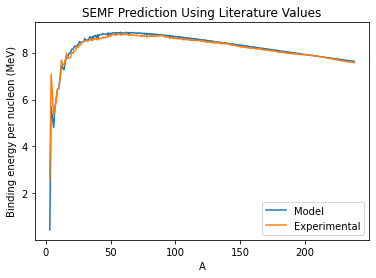

In [5]:
# Parameters from literature
a_v = 15.75
a_s = 17.8
a_c = 0.711
a_sym = 23.7
a_p = 11.18

# Predict binding energies for all the nuclides we have data for using SEMF
BPred = SEMF(AZ, a_v, a_s, a_c, a_sym, a_p)

# Plot predicted and experimental binding energies
ax = plt.plot(A, BPred/A, A, BperA)
plt.xlabel("A")
plt.ylabel("Binding energy per nucleon (MeV)")
plt.legend(["Model", "Experimental"])
plt.title("SEMF Prediction Using Literature Values")

## Fitting the SEMF parameters
Now we will try to determine our own set of parameters for the SEMF model by fitting to the experimental data. For this we will use the curve_fit function from scipy which will try to determined the value of the parameters which minimises the difference between the SEMF predictions and the experimental values. The values should be similar to, but not identical to, the literature values, since the fit is not done in quite the same way or to exactly the same set of nuclides.

Fitted parameters:
a_v = 15.64
a_s = 17.77
a_c = 0.71
a_sym = 22.36
a_p = 11.79


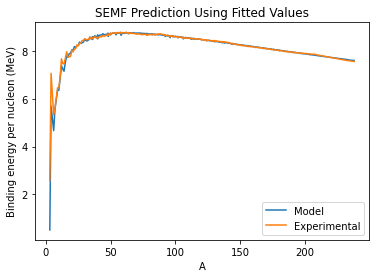

In [6]:
# Perform a fit of the SEMF to experimental data and store the fitted values
(fitVals, errs) = curve_fit(SEMF, (A,Z), B)
(a_v, a_s, a_c, a_sym, a_p) = fitVals

# Generate predicted binding energies using the SEMF with the fitted values
BPredFitted = SEMF(AZ, a_v, a_s, a_c, a_sym, a_p)

# Plot SEMF predicted binding energies with experiment binding energies
ax = plt.plot(A, BPredFitted/A, A, BperA)
plt.xlabel("A")
plt.ylabel("Binding energy per nucleon (MeV)")
plt.legend(["Model", "Experimental"])
plt.title("SEMF Prediction Using Fitted Values")

# Display the fitted values
print("Fitted parameters:")
print("a_v =", round(a_v,2))
print("a_s =", round(a_s,2))
print("a_c =", round(a_c,2))
print("a_sym =", round(a_sym,2))
print("a_p =", round(a_p,2))


## The Magic Numbers
The SEMF under-estimates the binding energy for certain nuclides which specific numbers of protons and/or neutrons. These are the 'magic numbers': 2,8,20,28,50,82,126. Below we plot the difference between the measured binding energy and the preducted binding energy from our fitted SEMF model as function of Z (blue) and N (orange). The magic numbers are shown as green lines, and we can see the peaks match well. This hints at some kind of shell-filling behaviour in nuclei. 

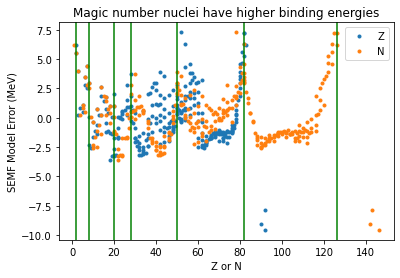

In [89]:
plt.plot(Z, B - BPredFitted, '.',A-Z, B - BPredFitted ,'.')

magicNumbers = [2, 8, 20, 28, 50, 82, 126]
for i in magicNumbers:
    plt.axline((i, -5), (i, 5), color = 'green')
    
plt.xlabel("Z or N")
plt.ylabel("SEMF Model Error (MeV)")
plt.title("Magic number nuclei have higher binding energies")
plt.legend(["Z", "N"])
